In [ ]:
# 드라이브 마운트
import os
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# 머신러닝 개요

## 도미 데이터

In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 
                30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 
                33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 
                36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 
                450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 
                700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 
                925.0, 975.0, 950.0]

## 빙어 데이터

In [ ]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 
                12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 
                13.4, 12.2, 19.7, 19.9]

## 데이터 비교


Text(0, 0.5, 'bream weight')

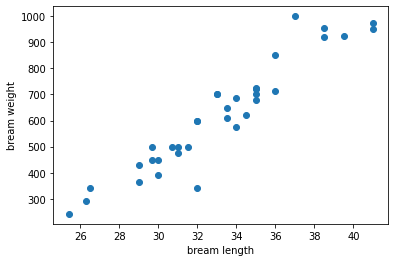

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(bream_length, bream_weight)
plt.xlabel('bream length')
plt.ylabel('bream weight')

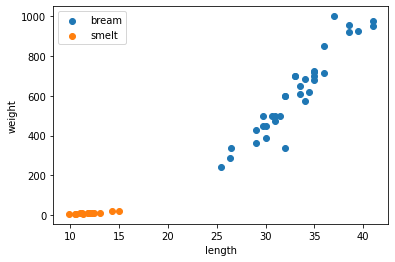

In [ ]:
plt.scatter(bream_length, bream_weight, label='bream')
plt.scatter(smelt_length, smelt_weight, label='smelt')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

## 2차원 리스트로 데이터 변형

In [ ]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [ ]:
fish_data = [[l, w] for l, w in zip(length, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


## 정답 데이터 준비

In [ ]:
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## k-최근접 알고리즘 개요

In [ ]:
# kNN 모델 생성
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [ ]:
# 모델 훈련
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [ ]:
# 모델 평가
kn.score(fish_data, fish_target)

1.0

In [ ]:
# 새로운 데이터를 활용한 결과 예측
kn.predict([[30, 600]])

array([1])

score:  1.0
predict:  [1]


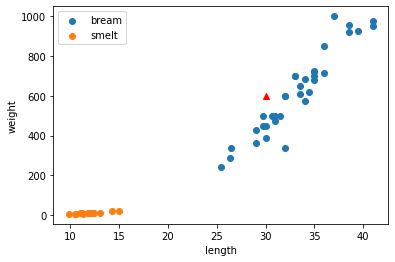

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import platform

kn = KNeighborsClassifier()
# 모델 생성
kn.fit(fish_data, fish_target) # 모델 훈련
print("score: ", kn.score(fish_data, fish_target)) # 모델 평가
print("predict: ", kn.predict([[30, 600]])) # 정답 예측, 리턴값: class label(분류값: 0, 1)


plt.scatter(bream_length, bream_weight, label='bream')
plt.scatter(smelt_length, smelt_weight, label='smelt')
plt.scatter(30, 600, marker='^', color='red')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

## k-최근접 알고리즘 속성

In [ ]:
kn49 = KNeighborsClassifier(n_neighbors=49)

kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [ ]:
print(35/49)

0.7142857142857143


# 데이터 다루기

## 훈련 세트와 테스트 세트 만들기

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 
              30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 
              33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0,
              36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
              10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 
              12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 
               450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 
               700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
               700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 
               925.0, 975.0, 950.0, 6.7,  7.5, 7.0, 9.7, 9.8, 8.7, 
               10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

## train데이터와 test데이터로 분리

In [ ]:
# 올바른 분류 방법이 아님
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

# 도미 데이터로 훈련
kn = kn.fit(train_input, train_target)
            
# 빙어 데이터로 평가
kn.score(test_input, test_target)

0.0

## 넘파이